In [3]:
# Data Source: https://www.kaggle.com/datasets/kaggle/world-development-indicators
# Folder: 'world-development-indicators' 

<br><p style="font-family: Arial; font-size:3.75em;color:green; font-style:bold">
World Development Indicators</p><br><br>
# Exploring Data Visualization 

In [114]:
#import libraries

import pandas as pd
import sqlite3
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

In [115]:
# loading the csv files into pandas DFs
indicators = pd.read_csv('../DS_World_Development_Indicators/data_wdi/Indicators.csv')


In [31]:
# Take a look into the dataframes
indicators.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [14]:
# This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CountryName    object 
 1   CountryCode    object 
 2   IndicatorName  object 
 3   IndicatorCode  object 
 4   Year           int64  
 5   Value          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


### How many UNIQUE country names are there ?

In [4]:
countries = indicators['CountryName'].unique().tolist()
len(countries)

247

### Are there same number of country codes ?

In [5]:
# How many unique country codes are there ? (should be the same #)
countryCodes = indicators['CountryCode'].unique().tolist()
len(countryCodes)

247

### Are there many indicators or few ?

In [6]:
# How many unique indicators are there ? (should be the same #)
var_indicators = indicators['IndicatorName'].unique().tolist()
len(var_indicators)

1344

In [116]:
# List the five first Indicators
var_indicators.sort()
var_indicators[:3]

['2005 PPP conversion factor, GDP (LCU per international $)',
 '2005 PPP conversion factor, private consumption (LCU per international $)',
 'ARI treatment (% of children under 5 taken to a health provider)']

### How many years of data do we have ?

In [117]:
# How many years of data do we have ?
years = indicators['Year'].unique().tolist()
len(years)

56

### What's the range of years?

In [118]:
print(min(years)," to ",max(years))

1960  to  2015


### Creating masks

we just want the data from <b>Brazil</b>

In [102]:
# Creating masks to select only a few indicators
education_expenditure = 'Expenditure on education as % of total'
life_expectancy = 'Life expectancy at birth, total'
gross_domestic_income_LCU = 'Gross domestic income \(constant LCU'
infant_deaths = 'Number of infant deaths'
health_expenditure = 'Health expenditure, total \(% of GDP'
selected_country_BRA = 'BRA' #Brazil
access_electricity = 'Access to electricity \(% of population'


mask1 = indicators['IndicatorName'].str.contains(education_expenditure)
mask2 = indicators['IndicatorName'].str.contains(life_expectancy)
mask3 = indicators['IndicatorName'].str.contains(gross_domestic_income_LCU)
mask4 = indicators['CountryCode'].str.contains(selected_country_BRA)
mask5 = indicators['IndicatorName'].str.contains(infant_deaths)
mask6 = indicators['IndicatorName'].str.contains(health_expenditure)


# Creating new DF matching the masks 
df_expenditure = indicators[mask1 & mask4]
df_life_expectancy = indicators[mask2 & mask4]
df_gross_domestic_income_LCU = indicators[mask3 & mask4]
df_healh_expenditure = indicators[mask6 & mask4]
df_infant_deaths = indicators[mask5 & mask4]
df_brazil = indicators[mask4]

In [107]:
#Cheking for Null values

not_null = 0
not_null == df_expenditure.isnull().sum() & df_life_expectancy.isnull().sum() & df_gross_domestic_income_LCU.isnull().sum() & df_infant_deaths.isnull().sum()& df_healh_expenditure.isnull().sum()

CountryName      True
CountryCode      True
IndicatorName    True
IndicatorCode    True
Year             True
Value            True
dtype: bool

### Plotting some data - Country = Brazil

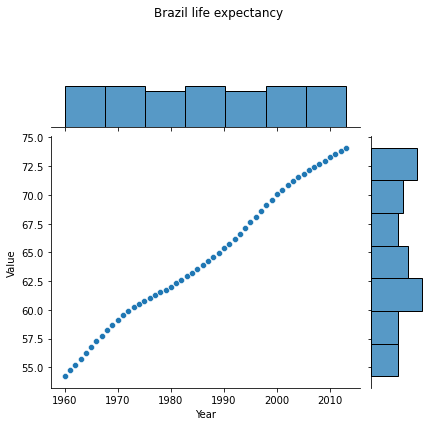

In [109]:
rel = sns.jointplot(data = df_life_expectancy, x="Year", y="Value");
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('Brazil life expectancy');

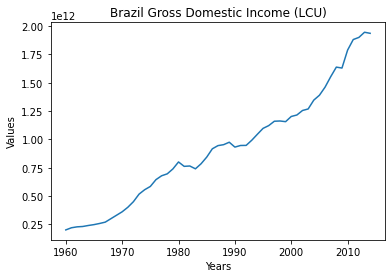

In [152]:
plt.plot(df_gross_domestic_income_LCU["Year"].values, df_gross_domestic_income_LCU["Value"].values)
plt.xlabel("Years")
plt.ylabel("Values")
plt.title("Brazil Gross Domestic Income (LCU)");
#plt.axis([1960, 2016,0,2])

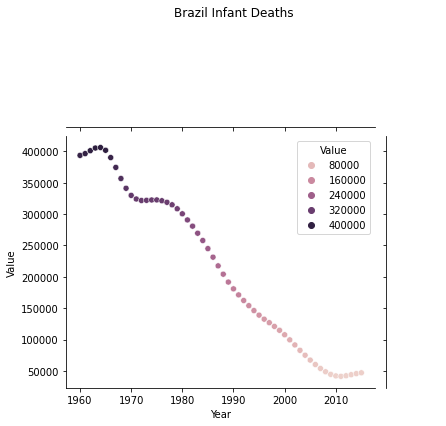

In [147]:
rel =sns.jointplot(data = df_infant_deaths, x="Year", y="Value",hue="Value")
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('Brazil Infant Deaths');

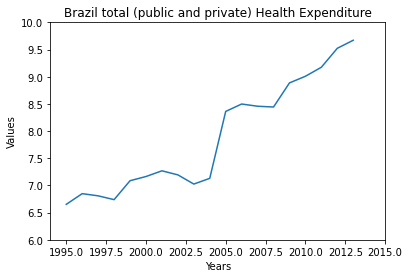

In [166]:
plt.plot(df_healh_expenditure["Year"].values, df_healh_expenditure["Value"].values)
plt.xlabel("Years")
plt.ylabel("Values")
plt.title("Brazil total (public and private) Health Expenditure")
plt.axis([1994, 2015,6,10]);

# WDI Interactive Plots

In [170]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import pylab as plt
pd.set_option('display.width',140)
from bokeh.io import show, output_notebook, export_png
from bokeh.models import ColumnDataSource, ColorBar, HoverTool
from bokeh.tile_providers import get_provider, Vendors
from bokeh.plotting import figure
from bokeh.palettes import brewer
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider, Select

output_notebook()
#output_file('test.html')

import panel as pn
from panel.interact import interact, interactive, fixed, interact_manual
from panel import widgets

pn.extension()

Loading BokehJS ...

In [172]:
#wdi = pd.read_csv('data/WDIData.csv.gz')
wdi = pd.read_csv('../DS_World_Development_Indicators/data_wdi/Indicators.csv')

#country names only
countries = list(wdi['CountryName'].unique()[47:])
scountries = ['Zimbabwe','Zambia','Botswana','Namibia','South Africa']
#indicator names
names = list(wdi['IndicatorName'])
wdi = wdi[wdi['CountryName'].isin(countries)]
print (wdi[20:25])

     CountryName CountryCode                                   IndicatorName      IndicatorCode  Year         Value
4647     Bahrain         BHR         Life expectancy at birth, total (years)     SP.DYN.LE00.IN  1960  5.208937e+01
4648     Bahrain         BHR               Merchandise exports (current US$)  TX.VAL.MRCH.CD.WT  1960  1.900000e+08
4649     Bahrain         BHR               Merchandise imports (current US$)  TM.VAL.MRCH.CD.WT  1960  1.800000e+08
4650     Bahrain         BHR                   Mobile cellular subscriptions        IT.CEL.SETS  1960  0.000000e+00
4651     Bahrain         BHR  Mobile cellular subscriptions (per 100 people)     IT.CEL.SETS.P2  1960  0.000000e+00


# Matplotlib line plots

In [173]:
from matplotlib.figure import Figure
from cycler import cycler

def plot_col(df, col, kind='line', color=True):
    """plot a specific column"""
    
    fig = Figure(figsize=(10, 6))
    ax = fig.subplots() 
    ax.set_title(col)
    default_cycler = ( cycler('linestyle', ['-', '--', ':', '-.']))
    if color == False:       
        plt.rc('axes', prop_cycle=default_cycler)
        df.plot(lw=3,ax=ax,kind=kind,color='black') 
    else:        
        cmap='Spectral'  
        df.plot(lw=3,ax=ax,kind=kind,cmap=cmap,linestyle='-') 
    return fig

def get_data(col,years=None,countries=None):
    """get data from the wdi dataframe"""
    
    x = wdi.set_index('IndicatorName')
    x = x.loc[col].set_index('CountryName')
    if countries!=None:
        x = x.loc[countries]
    x = x[x.columns[3:-2]]
    x = x.T
    x.index=x.index.astype(int)
    if years!=None:
        x = x.loc[years]    
    return x

col=wdi.iloc[64]['IndicatorName']
df = get_data(col)
fig=plot_col(df, col)
fig.savefig('%s.png' %col,dpi=200)

# Panel app for interactive plot

In [ ]:
select=pn.widgets.Select(name='Indicator',options=names[:900],value=names[24])
daterange = pn.widgets.RangeSlider(name='Dates', start=1961, end=2019, value=(1961,2019), step=1)
countryselect = pn.widgets.MultiSelect(name='Country',options=countries,value=scountries,size=8)
typeselect = pn.widgets.Select(name='Plot kind',options=['line','area'])
colorselect = pn.widgets.Checkbox(name='Color',value=True)

@pn.depends(select.param.value,daterange.param.value,
            countryselect.param.value,typeselect.param.value,colorselect.param.value)
def update(col, years, countries, kind, color):
    years = range(years[0],years[1])
    df = get_data(col,years,countries)    
    f = plot_col(df, col, kind, color)
    return f

app = pn.Row(pn.Column(select,countryselect,daterange,typeselect,colorselect), update)
app

# bokeh plot

In [179]:
from bokeh.models.widgets import Select
from bokeh.layouts import gridplot, column

def bokeh_plot_col(attr, old, new):
    """Bokeh plot WDI indicators"""
    
    col = select.value
    x = wdi.set_index('IndicatorName')
    x = x.loc[col]    
    m = pd.melt(x, id_vars=['CountryName'], value_vars=wdi.columns[4:-1])
    #print (m)
    source = ColumnDataSource(m)
    from bokeh.palettes import Spectral11
    mypalette=Spectral11[0:4]
    p = figure(plot_width=600,plot_height=400,tools="hover,xwheel_zoom,xpan")   
    line = p.line(x='variable',y='value',source=source,line_width=5)
    #p.legend()
    p.grid.visible = False
    
    return p

select = Select(title="Option:", value=names[0], options=names[:345])
select.on_change('value', bokeh_plot_col)

p1 = bokeh_plot_col(None,None,None)    
p = gridplot([[select,p1]], toolbar_location='below')
show(p)

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



In [175]:
app.servable()

NameError: name 'app' is not defined